## Machine Learning: Loaded or Fair Die? Hidden Markov Models / Baum-Welch Algorithm / Backward-Forward Algorithm

In [110]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sla
import random

To get an idea of our data, I'll plot a bar chart showing the frequency of each roll:

Text(0.5, 1.0, 'Frequency of Rolls')

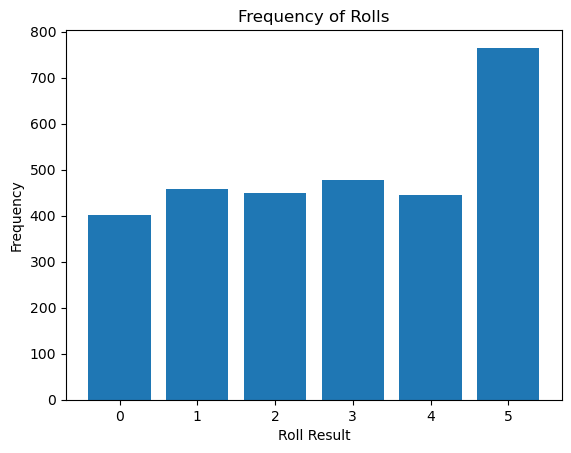

In [111]:
sides = 6
num_rolls = 3000
rolls_freq = np.zeros(sides, dtype=int)
rolls = np.zeros(num_rolls, dtype=int)
counter = 0
with open("rolls.txt") as file:
    for line in file:
        roll = int(line)
        rolls[counter] = roll
        rolls_freq[roll] += 1
        counter += 1
rolls = np.array(rolls)


faces = np.arange(sides)
fig, ax = plt.subplots()
ax.bar(faces, rolls_freq)
ax.set_xlabel("Roll Result")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of Rolls")

As expected, there are disproprortionally more rolls of a 5, which suggests that one of the dice is loaded.

We would like to learn the parameters of the model $\Theta =$ ($\pi$, $\theta$, and $\omega$) that maximize the log-likelihood $\ell (\pi, \theta, \omega | x_{0:T}, y_{0:T})$ through expectation maximization

In [120]:
hidden_dice = np.zeros(num_rolls, dtype=int)
A = np.ndarray((2, 2), dtype=float)
#Let's call the 1-index the loaded die, and the 0 index the normal die
A[0][0] = 0.9
A[0][1] = 0.1
A[1][0] = 0.8
A[1][1] = 0.2

#Given we're we've rolled j, whats the probability the dice is i?
B = np.ndarray((2, 6), dtype=float)
B[0][0] = 0.7
B[0][1] = 0.6
B[0][2] = 0.5
B[0][3] = 0.5
B[0][4] = 0.4
B[0][5] = 0.3

B[1][0] = 0.3
B[1][1] = 0.4
B[1][2] = 0.5
B[1][3] = 0.5
B[1][4] = 0.6
B[1][5] = 0.7

#Guess for initial die
pi_0 = 0.75
pi_1 = 0.25

print(B)

[[0.7 0.6 0.5 0.5 0.4 0.3]
 [0.3 0.4 0.5 0.5 0.6 0.7]]
